In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Import the missing class
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# Import EarlyStopping and ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# ... (rest of your code remains unchanged)

In [3]:
# Diretórios e Configurações
data_dir = "/content/PetImages"  # Double-check this path
train_dir = f"{data_dir}/train"    # Double-check this path
val_dir = f"{data_dir}/validation" # Double-check this path
batch_size = 32
img_size = (224, 224)

# ... (rest of your code remains unchanged)

# Add a check after creating the generators:
import os

if not os.listdir(train_dir) or not os.listdir(val_dir):
    print("Error: Training or validation directory is empty.")
    print(f"train_dir: {train_dir}")
    print(f"val_dir: {val_dir}")
    # Handle the error appropriately (e.g., raise an exception, exit the script)

# Geradores de Dados
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Configuração de Transfer Learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congela as camadas da base pré-treinada

# Adicionando Camadas Densas no Topo
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o Modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks para Early Stopping e Salvar Melhor Modelo

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_loss')
    # Changed filepath to 'best_model.keras'
]
# Inspecionar Batch de Dados
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break  # Mostra apenas o primeiro batch

# Treinamento do Modelo
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

# Função para Predizer Imagem Individual
def predict_image(image_path):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_name = 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    print(f"The image is classified as: {class_name}")
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
    plt.show()


Found 338 images belonging to 3 classes.
Found 559 images belonging to 5 classes.
Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32,)
Epoch 1/10
11/11 [==============================] - 52s 5s/step - loss: -7.7931 - accuracy: 0.5118 - val_loss: -72.2248 - val_accuracy: 0.0322
Epoch 2/10
11/11 [==============================] - 48s 5s/step - loss: -27.8768 - accuracy: 0.5503 - val_loss: -159.9521 - val_accuracy: 0.0322
Epoch 3/10
11/11 [==============================] - 47s 5s/step - loss: -51.8684 - accuracy: 0.5503 - val_loss: -265.7516 - val_accuracy: 0.0322
Epoch 4/10
11/11 [==============================] - 47s 4s/step - loss: -81.5522 - accuracy: 0.5503 - val_loss: -392.1521 - val_accuracy: 0.0322
Epoch 5/10
11/11 [==============================] - 48s 5s/step - loss: -118.6028 - accuracy: 0.5503 - val_loss: -543.9540 - val_accuracy: 0.0322
Epoch 6/10
11/11 [==============================] - 47s 5s/step - loss: -155.9903 - accuracy: 0.5503 - val_loss: -720.5422 - val_acc

1/1 [==============================] - 0s 45ms/step
The image is classified as: Dog


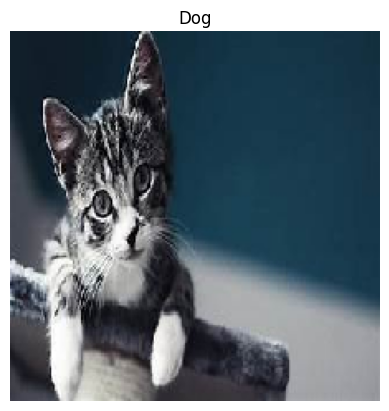

1/1 [==============================] - 0s 45ms/step
The image is classified as: Dog


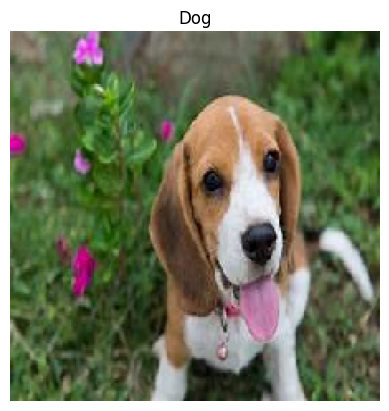

In [6]:

#Exemplo de uso
image_path = "/content/gato.jpg"
predict_image(image_path)
image_path2 = "/content/cachorro.jpeg"
predict_image(image_path2)
